In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import pandas as pd

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# QUESTION 1

## Load Data

In [2]:
data= sio.loadmat('/Users/ugbohlisa/Documents/GOOG_20141114.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

### Compute Midprice

In [4]:
Midprice = 0.5*(bid[:,0]+ask[:,0]) #formula for midprice
Midprice

array([546.825, 546.925, 546.815, ..., 544.34 , 544.34 , 544.34 ])

### Plot Midprice

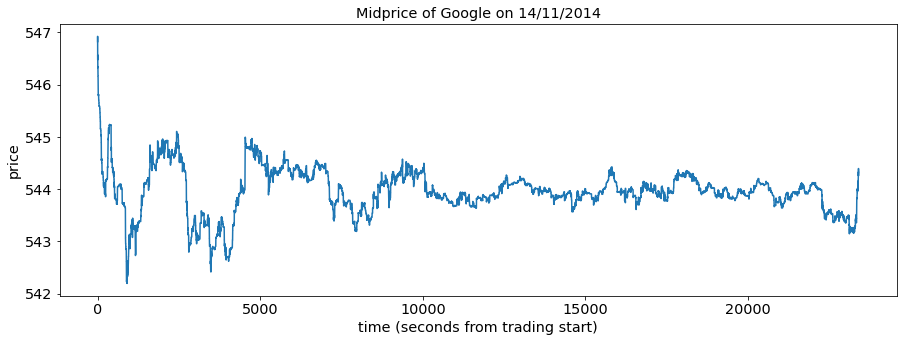

In [5]:
plt.plot(t, Midprice)
plt.title('Midprice of Google on 14/11/2014')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

### Compute Microprice

In [6]:
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])  #formula for microprice
microprice

array([547.03333333, 546.85514019, 547.06188925, ..., 544.36665511,
       544.36665511, 544.3692326 ])

### Plot Microprice

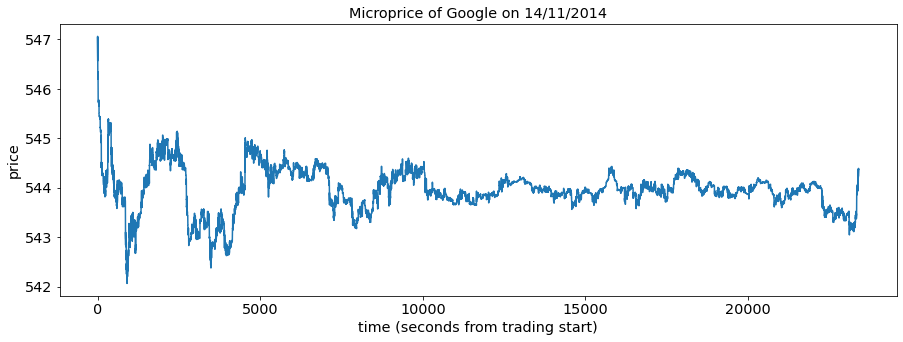

In [7]:
plt.plot(t, microprice)
plt.title('Microprice of Google on 14/11/2014')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

#### Plot the difference between mid prices and micro prices

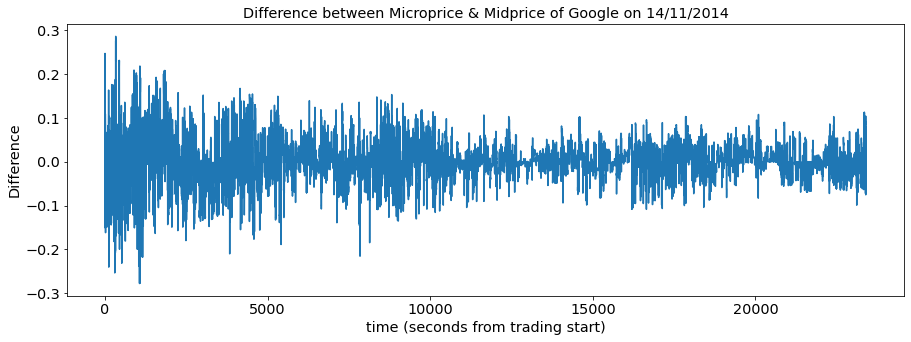

In [8]:
plt.plot(t, microprice-Midprice)
plt.title('Difference between Microprice & Midprice of Google on 14/11/2014')
plt.ylabel('Difference')
plt.xlabel('time (seconds from trading start)')
plt.show()

### Compute Spread

In [9]:
spread = ask[:,0]-bid[:,0]   #formula for spread
spread

array([1.25, 1.15, 0.93, ..., 0.12, 0.12, 0.12])

### Plot Spread

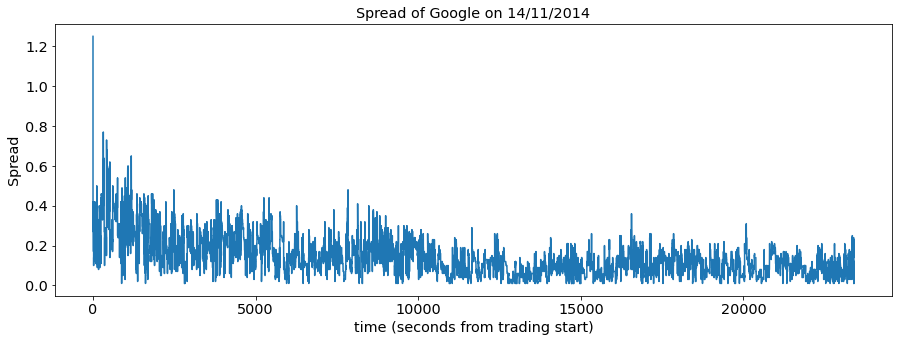

In [10]:
plt.plot(t,spread)
plt.title('Spread of Google on 14/11/2014')
plt.ylabel('Spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

###### This plot shows that the spread is about 0.13 in the morning, but quickly drops to 0.01 but sometimes spikes to 0.02 (mostly in the morning).

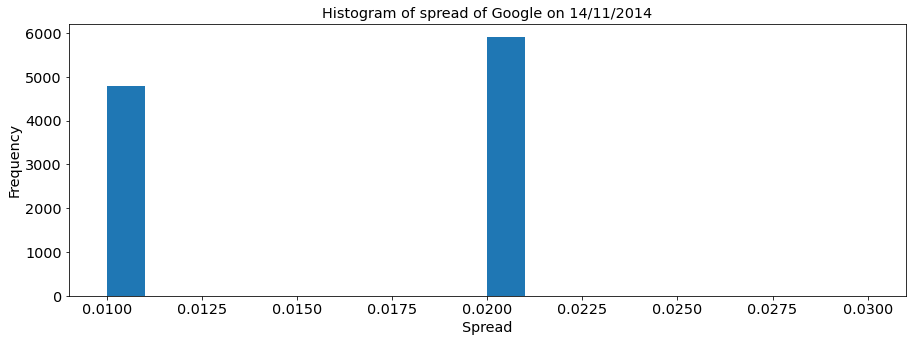

In [11]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Histogram of spread of Google on 14/11/2014")
plt.xlabel('Spread')
plt.ylabel('Frequency')
plt.show()

### Compute and Plot of Volume Imbalance

In [12]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

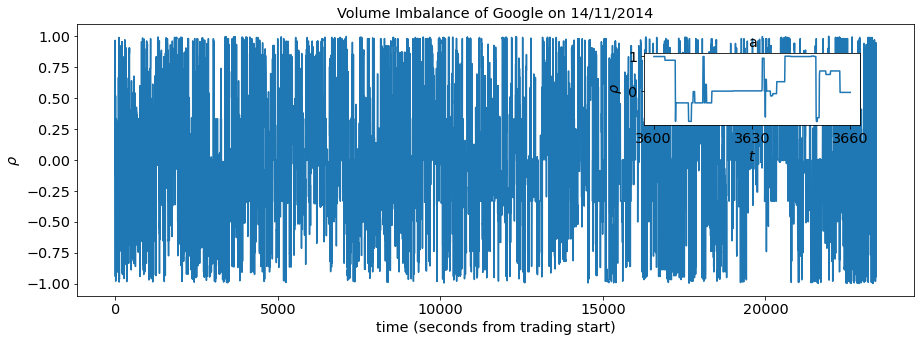

In [13]:
plt.plot(t, rho)
plt.title('Volume Imbalance of Google on 14/11/2014')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

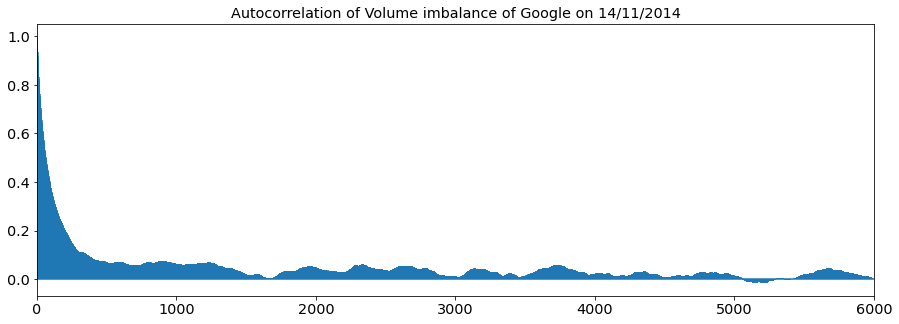

In [14]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of Volume imbalance of Google on 14/11/2014')
plt.xlim([0,6000])
plt.show()

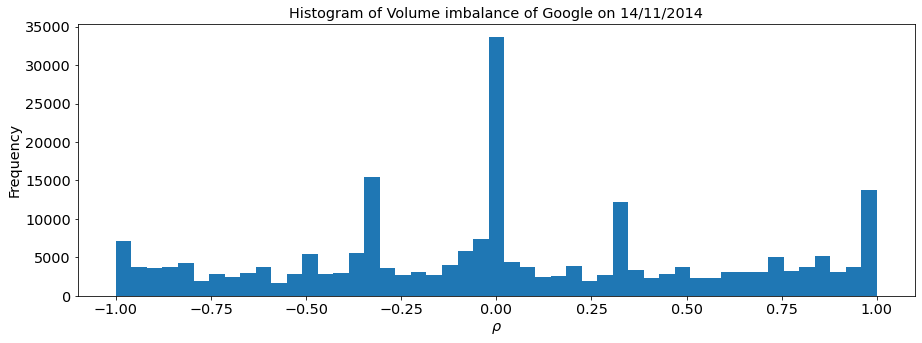

In [15]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Histogram of Volume imbalance of Google on 14/11/2014")
plt.xlabel(r'$\rho$')
plt.ylabel('Frequency')
plt.show()

### Volume Imbalance at times of Market Orders

In [16]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

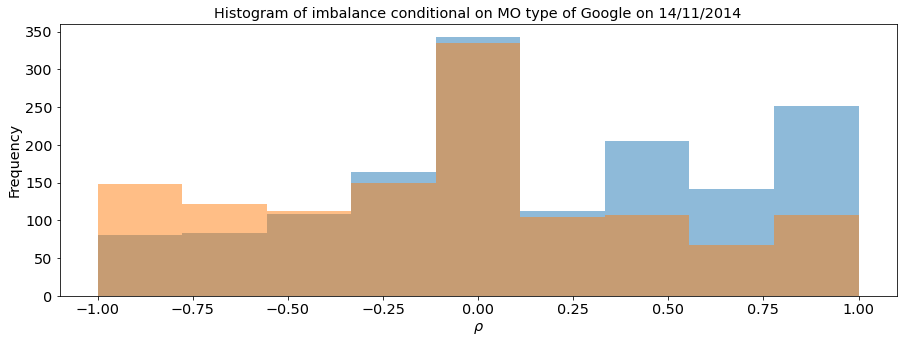

In [17]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Histogram of imbalance conditional on MO type of Google on 14/11/2014")
plt.xlabel(r'$\rho$')
plt.ylabel('Frequency')
plt.show()

## Analysis of Data

In [18]:
Midprice = pd.DataFrame(Midprice)
Midprice.describe()

,0
count,234000.000000
mean,543.960599
std,0.425755
min,542.195000
25%,543.790000
50%,543.950000
75%,544.180000
max,546.925000


In [19]:
Microprice = pd.DataFrame(microprice)
Microprice.describe()

,0
count,234000.000000
mean,543.960857
std,0.429750
min,542.064015
25%,543.777090
50%,543.960730
75%,544.186522
max,547.061889


In [20]:
Spread = pd.DataFrame(spread)
Spread.describe()

,0
count,234000.000000
mean,0.142603
std,0.091944
min,0.010000
25%,0.080000
50%,0.130000
75%,0.190000
max,1.250000


# QUESTION 2

In [21]:
pip install import-ipynb      

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Import necessary libraries.
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


## Set up Parameters

In [23]:
S0 = 100
N = 20 ** 6 #Initial number of stocks
T = 1;     #end of the period
k = 0.0003;
b = 0.0005
M = 1000;    #Number of trading times
alpha = 0.1;  #terminal liquidation penalty
phi = 0.01;   
sigma = 0.50;   #sigma

### Calculate the rest parameters

In [24]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [25]:
tt = np.linspace(0, 1, M + 1)

### Optimal Trading Speed and Inventory Process

In [26]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

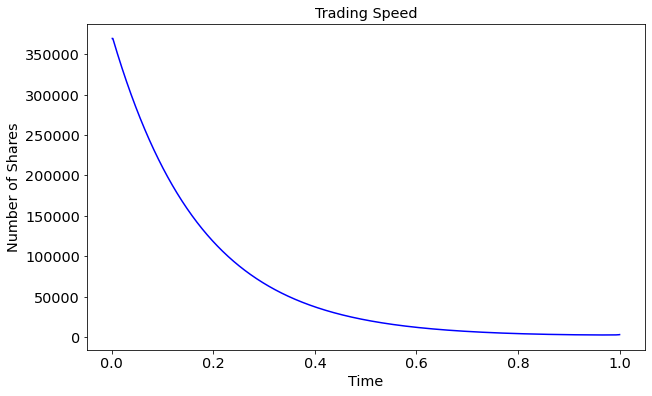

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

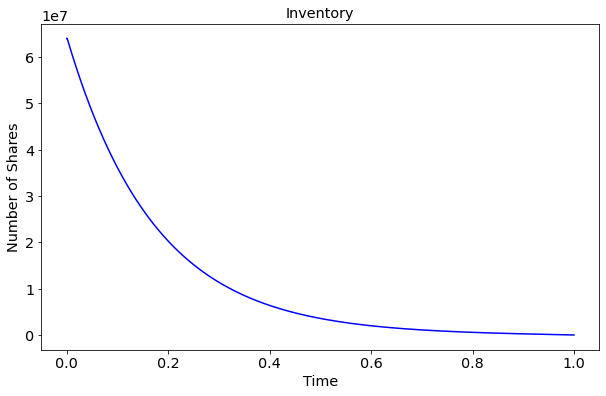

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

######  The optimal trading speed to trade at  𝜈∗𝑡  and inventory along the optimal strategy  𝑄𝜈∗𝑡  are computed below

In [29]:
# Parameter settings
T = 1                    #Time 1 day
Ndt = 6.5 * 3600         #6.5 trading hours * 60min *60 secs
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.0003               #set up reasonable number (e.g 0.003) Temp price impact
b = 0.0005              #set up reasonable number (e.g 0.005) Perma price impact

tau = T - t           #time left
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([0.0001, 0.001, 0.01, 0.1])        #set up reasonable number
symb = np.array(["o", "*", "+", "^"])

alpha = 200       #set up reasonable number

###### Now we use show the change of the investor's inventory along the optimal path for various levels of the running penalty  𝜙  as  𝛼  changes.

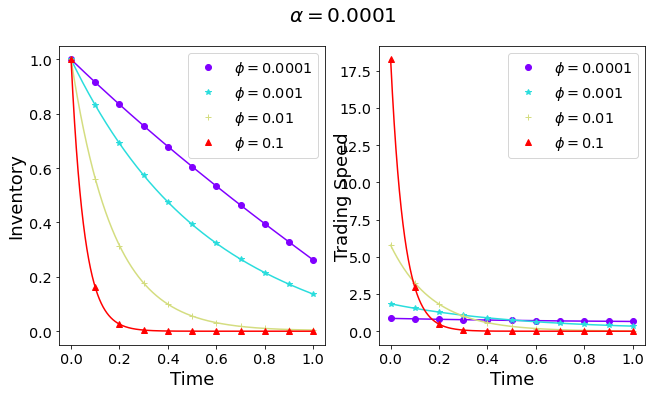

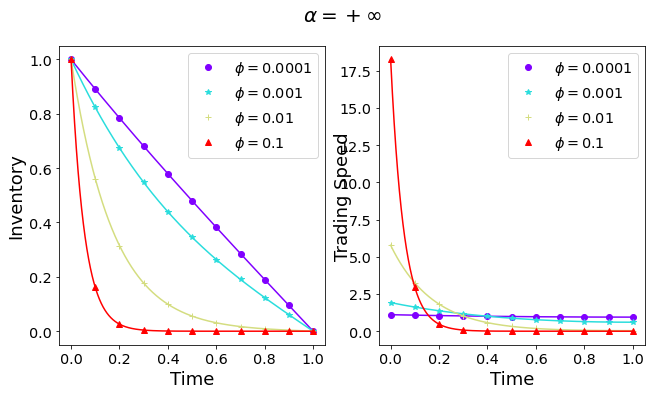

In [30]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.001, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.0001$")
lppi_helpers.plot_inventory_trading_speed(200000, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")